# 우선순위 큐로 heapq를 사용하는 방법 알기

**파이썬이 제공하는 다른 큐 구현들은 선인선출이라는 제약이 있다.**

그러나, 우선순위 큐는 원소간의 상대적인 중요도에 따라서 원소를 정렬합니다.

In [1]:
#대출한 책 표현

"""
연체 메시지 시스템일 필요하다.
최근에 발간된 책이나 유명한 책인지 요소에 따라 다르다
FIFO 사용 불가
"""

class Book:
    def __init__(self,title, due_date):
        self.title = title
        self.due_date = due_date



In [2]:
#Book이 도착할 때마다 원소를 정렬해서 기능

def add_book(queue, book):
    queue.append(book)
    queue.sort(key=lambda x: x.due_date, reverse=True)

queue = []
add_book(queue, Book('돈기호테', '2020-06-07'))
add_book(queue, Book('프랑켄슈타인', '2020-06-05'))
add_book(queue, Book('레미제라블', '2020-06-08'))
add_book(queue, Book('전쟁과 평화', '2020-06-03'))




**리스트에서 연체된 책이 있으면 그런 책을 한 권 찾아 큐에서 제거하고 돌려주는 함수를 정의**

In [3]:
class NoOverdueBooks(Exception):
    pass

def next_overdue_book(queue, now):
    if queue:
        book = queue[-1]
        if book.due_date < now:
            queue.pop()
            return book

    raise NoOverdueBooks


**연체된 책들을 찾고, 연체 기간이 가장 긴 책부터 짧은 책 순서로 회원들**

In [4]:
now = "2020-06-10"

found = next_overdue_book(queue, now)
print(found.title)

found = next_overdue_book(queue, now)
print(found.title)

전쟁과 평화
프랑켄슈타인


**책 만기일 이전에 반환 시, 리스트에서 반납된 Book을 제거해 연체 통지가 예정된 책 목록에서 해당 책을 제거할 수 있다.**

In [5]:
def return_book(queue,book):
    queue.remove(book)

queue = []
book = Book('보물섬', '2020-06-04')

add_book(queue, book)
print('반납 전:', [x.title for x in queue])

return_book(queue, book)
print('반납 후:', [x.title for x in queue])

반납 전: ['보물섬']
반납 후: []


In [6]:
try:
    next_overdue_book(queue, now)
except NoOverdueBooks:
    pass # 이 문장이 실행될 것으로 예상

else:
    assert False #실행 되지 않음

**사간 복잡도가 선형보다 더 크게 증가한다.**

In [ ]:
#timeit 내장 모듈을 마이크로 벤치마크 정의

import random
import timeit

def print_results(count, tests):
    ...

def print_delta(before, after):
    ...

def list_overdue_benchmark(count):
    def prepare():
        to_add = list(range(count))
        random.shuffle(to_add)
        random.shuffle(to_add)
        return [], to_add

    def run(queue, to_add):
        for i in to_add:
            queue.append(i)
            queue.sort(reverse=True)

        while queue:
            queue.pop()


    tests = timeit.repeat(
        setup = 'queue, to_add = prepare()',
        stmt = f'run(queue, to_add)',
        globals = locals(),
        repeat = 100
        number = 1)
    
    return print_results(count, tests)

    

**대출하는 책의 수가 늘어남에 따라서 큐에 책을 추가하고 제거하는 선형보다 더 빠르게 증가**

In [ ]:
baseline = list_overdue_benchmark(500)
for count in (1_000, 1_500, 2_000):
    comparison = list_overdue_benchmark(count)
    print_delta(baseline, comparison)

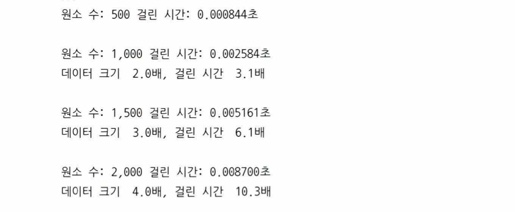

In [ ]:
def list_return_benchmark(count):
    def prepare():
        queue = list(range(count))
        random.shuffle(queue)

        to_return = list(range(count))
        random.shuffle(to_return)

        return queue, to_return


    tests = timeit.repeat(
        setup = 'queue, to_return = prepare()',
        stmt = f'run(queue, to_return)',
        globals = locals(),
        repeat = 100
        number = 1)
    
    return print_results(count, tests)



**선형보다 더 나쁘고 빠르게 진행**

In [ ]:
baseline = list_return_benchmark(500)
for count in (1_000, 1_500, 2_000):
    comparison = list_return_benchmark(count)
    print_delta(baseline, comparison)

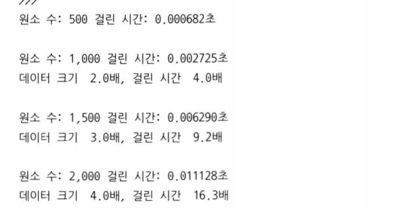

### 위와 같은 경우 우선순위 큐를 사용하면 된다.

- 새로운 원소 추가 혹은 가장 작은 원소를 제거 시 로그 복잡도를 따른다.

- 작동하는 힙을 어떻게 구현 하는지에 대해 여러분이 신경 쓸 필요가 없다.

In [ ]:
from heapq import heappush

def add_book(que,book):
    heappush(queue, book)


queue = []
add_book(queue, Book('작은 아씨들', '2020-06-05'))
add_book(queue, Book('타임 머신', 2020-05-30))

**빠르게 Book 인스턴스 사이에 due_date 필드 비교**

In [ ]:
import functools

@functools.total_due_date

class Book:
    def __init__(self, title, due_date):
        self.title = title
        self.due_date = due_date

    def __lt__(self, other):
        return self.due_date < other.due_date

**heapq.heappush 함수를 사용해도 아무 문제없이 책을 우선순위 큐 등록**

sort메서드를 사용해 힙을 만들 수 있다.

In [ ]:
queue = []
add_book(queue, Book('오만과 편견','2020-06-01'))
add_book(queue, Book('타임 머신','2020-05-30'))
add_book(queue, Book('죄와 벌','2020-06-06'))
add_book(queue, Book('폭퐁의 언덕','2020-06-12'))


**heapq.heapify 함수를 사용하여 선형 시간에 힙을 만든다.**

- len(queue) * log(len(queue))

In [ ]:
from heapq import heapify

queue = [
    Book('오만과 편견', '2020-06-01'),
    Book('타임 머신', '2020-05-30'),
    Book('죄와 벌', '2020-06-06'),
    Book('폭훙의 언덕', '2020-06-012'),
]

In [7]:
from heapq import heappop

def next_overdue_book(queue, now):
    if queue:
        book = queue[0]
        if book.due_date < now:
            heappop(queue)
            return book

    raise NoOverdueBooks

**현재 시간보다 만기가 이른 책을 모두 찾아서 제거**